## 1. Importing Required Dependencies

In [455]:
import requests as re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 2. Importing and Exploring Data

In [456]:
# data importing
wine =  pd.read_csv("C:\\Users\\Gautham\\Downloads\\winequality-red-mod.csv")
wine.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,country,quality
0,1,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,UK,5
1,2,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Italy,5
2,3,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Italy,5
3,4,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Spain,6
4,5,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,UK,5


In [457]:
# data exploring
print(wine.shape)
print(wine.ndim)
wine.info()

(1506, 15)
2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 15 columns):
id                      1506 non-null int64
fixed acidity           1504 non-null float64
volatile acidity        1504 non-null float64
citric acid             1504 non-null float64
residual sugar          1504 non-null float64
flavonoids              1504 non-null float64
chlorides               1504 non-null float64
free sulfur dioxide     1504 non-null float64
total sulfur dioxide    1504 non-null float64
density                 1504 non-null float64
pH                      1504 non-null float64
sulphates               1504 non-null float64
alcohol                 1504 non-null float64
country                 1504 non-null object
quality                 1506 non-null int64
dtypes: float64(12), int64(2), object(1)
memory usage: 170.6+ KB


## 3. Cleaning Data
Two rows are missing categorical data and it is better to drop them since we cannot find the mean values of categorical data.

In [458]:
# dropping 2 rows with nan since there is no categorical data available
wine = wine.dropna()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 0 to 1505
Data columns (total 15 columns):
id                      1504 non-null int64
fixed acidity           1504 non-null float64
volatile acidity        1504 non-null float64
citric acid             1504 non-null float64
residual sugar          1504 non-null float64
flavonoids              1504 non-null float64
chlorides               1504 non-null float64
free sulfur dioxide     1504 non-null float64
total sulfur dioxide    1504 non-null float64
density                 1504 non-null float64
pH                      1504 non-null float64
sulphates               1504 non-null float64
alcohol                 1504 non-null float64
country                 1504 non-null object
quality                 1504 non-null int64
dtypes: float64(12), int64(2), object(1)
memory usage: 182.1+ KB


In [459]:
wine.describe()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,752.880984,8.406981,0.524890,0.273910,2.540060,0.597992,0.087533,15.597074,46.764628,0.996155,3.302553,0.657606,10.427238,5.635638
std,434.843358,1.757966,0.183892,0.198186,1.406215,0.252626,0.055560,10.456825,33.240872,0.057661,0.190515,0.177967,1.434245,0.815816
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000
25%,376.750000,7.200000,0.390000,0.100000,1.900000,0.494000,0.071000,7.000000,22.000000,0.995700,3.200000,0.550000,9.500000,5.000000
50%,752.500000,8.000000,0.520000,0.260000,2.200000,0.559000,0.080000,13.000000,38.000000,0.996800,3.300000,0.620000,10.100000,6.000000
75%,1128.250000,9.300000,0.635000,0.430000,2.600000,0.633000,0.091000,21.000000,63.000000,0.997900,3.400000,0.730000,11.100000,6.000000
max,1506.000000,15.900000,1.580000,1.000000,15.500000,3.206000,0.611000,72.000000,289.000000,1.999400,4.010000,2.000000,45.300000,8.000000


## 4. Data Visualisation

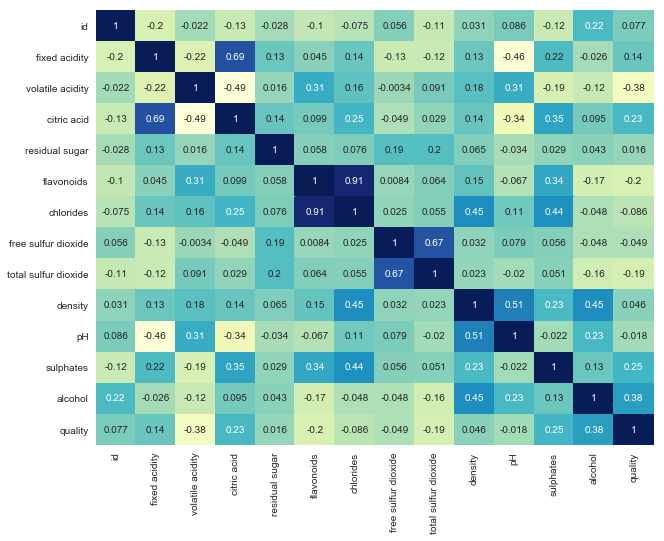

In [460]:
#Correlation Heatmap of Variables
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(),cmap='YlGnBu',annot=True,cbar=False)

Text(0.5,1,'QUALITY OF WINE')

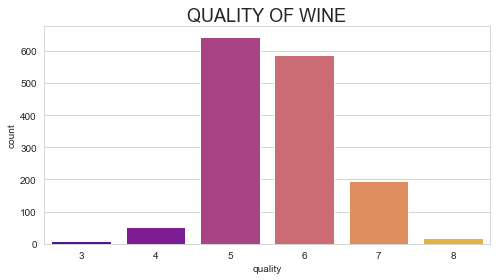

In [461]:
# plotting the quality of wine using a countplot
fig = plt.figure(figsize = (8,4))
sns.set_style("whitegrid")
sns.countplot(wine['quality'],palette='plasma')
plt.title("QUALITY OF WINE", size=18)

Text(0.5,1,'WINE FROM COUNTRIES')

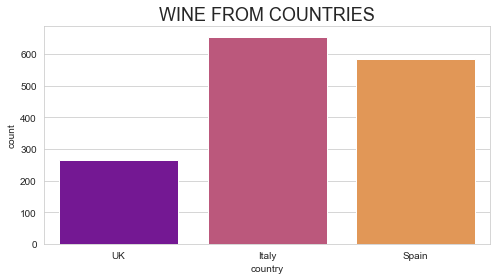

In [462]:
#plotting the wine from different countries using a countplot
fig = plt.figure(figsize = (8,4))
sns.set_style("whitegrid")
sns.countplot(wine['country'],palette='plasma')
plt.title("WINE FROM COUNTRIES", size=18)

Text(0.5,1,'Quality vs Citric Acid')

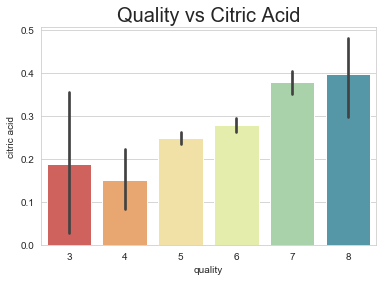

In [463]:
# plotting the quality of wine against citric acid using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'citric acid', data=wine, palette="Spectral")
plt.title('Quality vs Citric Acid', size=20)

Text(0.5,1,'Quality vs Residual Sugar')

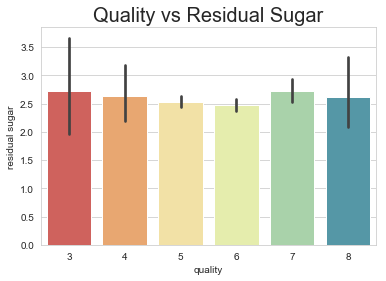

In [464]:
# plotting the quality of wine against residual sugar using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'residual sugar', data=wine, palette="Spectral")
plt.title('Quality vs Residual Sugar', size=20)

Text(0.5,1,'Quality vs Flavonoids')

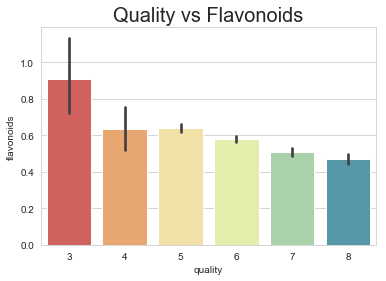

In [465]:
# plotting the quality of wine against flavonoids using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'flavonoids', data=wine, palette="Spectral")
plt.title('Quality vs Flavonoids', size=20)

Text(0.5,1,'Quality vs Chlorides')

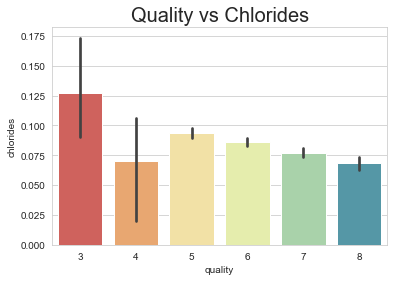

In [466]:
# plotting the quality of wine against chlorides using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'chlorides', data=wine, palette='Spectral')
plt.title('Quality vs Chlorides', size=20)

Text(0.5,1,'Quality vs Free Sulphur Dioxide')

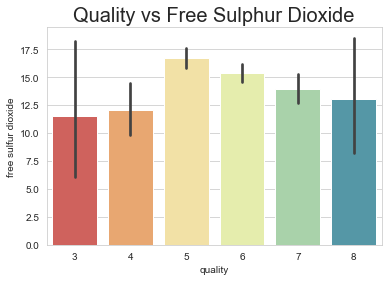

In [467]:
# plotting the quality of wine against free sulphur dioxide using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'free sulfur dioxide', data=wine, palette='Spectral')
plt.title('Quality vs Free Sulphur Dioxide', size=20)

Text(0.5,1,'Quality vs Total Sulphur Dioxide')

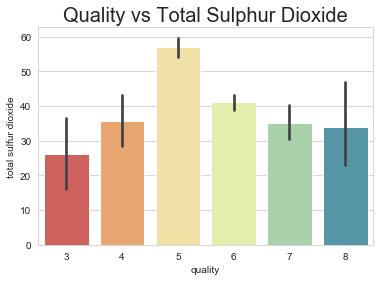

In [468]:
# plotting the quality of wine against total sulphur dioxide using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'total sulfur dioxide', data=wine, palette='Spectral')
plt.title('Quality vs Total Sulphur Dioxide', size=20)

Text(0.5,1,'Quality vs Density')

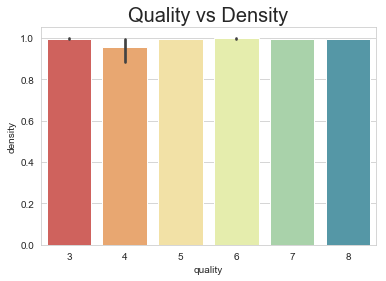

In [469]:
# plotting the quality of wine against the density using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'density', data=wine, palette='Spectral')
plt.title('Quality vs Density', size=20)

Text(0.5,1,'Quality vs PH Level')

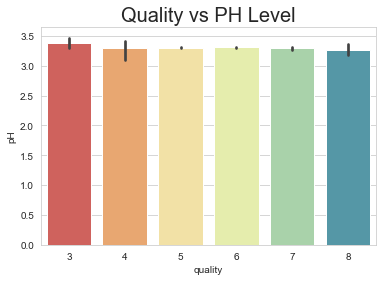

In [470]:
# plotting the quality of wine against PH level using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'pH', data=wine, palette='Spectral')
plt.title('Quality vs PH Level', size=20)

Text(0.5,1,'Quality vs Sulphates')

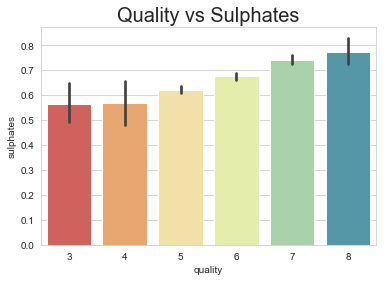

In [471]:
# plotting the quality of wine against Sulphates using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'sulphates', data=wine, palette='Spectral')
plt.title('Quality vs Sulphates', size=20)

Text(0.5,1,'Quality vs Alcohol')

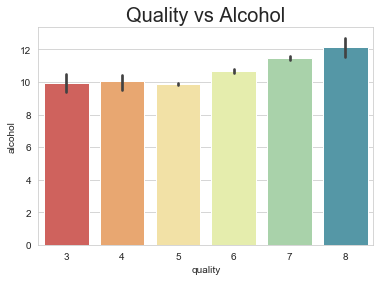

In [472]:
# plotting the quality of wine against the alcohol content using a barplot
sns.set_style("whitegrid")
sns.barplot('quality', 'alcohol', data=wine, palette='Spectral')
plt.title('Quality vs Alcohol', size=20)

## 5. PreProcessing Data for Building Machine Learning Algorithm

In [473]:
#Creating binary classificaion for prediction variable.
#classifyin wine as good and bad by giving a limit for the quality
bins = (2, 6.5, 8)
review = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = review)

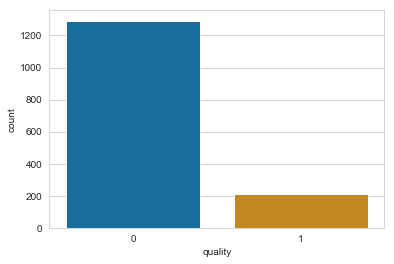

In [474]:
#assigning labels to quality variable
label_quality = LabelEncoder()

#0 is bad review and 1 is good review 
wine['quality'] = label_quality.fit_transform(wine['quality'])

#countplot for quality variable
sns.countplot(wine['quality'], palette='colorblind')

In [475]:
## replacing the categorical variable to an integer
country_to_nums = {'country':     {'UK': 1, 'Italy': 2, 'Spain':3}}
wine.replace(country_to_nums, inplace=True)
wine.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,country,quality
0,1,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,2,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,0
2,3,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0
3,4,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,0
4,5,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0


In [476]:
# dividing the dataset as prediction variable and feature variabes
x = wine.drop('quality', axis = 1)
y = wine['quality']

## 6. PCA Analysis

In [549]:
#Scaling the data using StandardScalar
sc = StandardScaler()
x = sc.fit_transform(x)

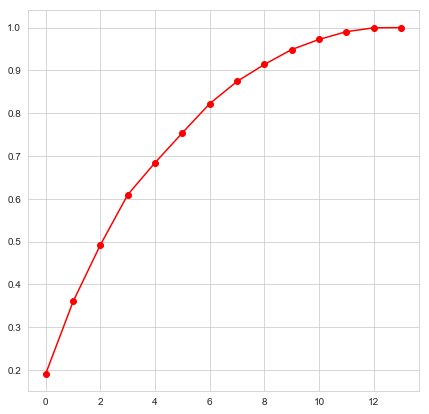

In [550]:
# Performing PCA
pca = PCA()
x_pca = pca.fit_transform(x)

#plot the graph to find the principal components
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')

In [551]:
#from the plot above, we can see that 9 principal components attribute for 90% of variation in the data. 
#we can pick the first 9 components for our prediction.
pca_n = PCA(n_components=9)
x_pca_new = pca_n.fit_transform(x)

In [552]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_pca_new, y, test_size = 0.2)

In [553]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1203, 9)
(301, 9)
(1203,)
(301,)


## 7. Logistic Regression

In [554]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

c:\users\gautham\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [555]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[261  10]
 [ 18  12]]
90.69767441860465


## 8. Decision Tree Classifier

In [556]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [557]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[245  26]
 [ 14  16]]
86.71096345514951


## 9. Random Forest Classifier

In [558]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

c:\users\gautham\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [559]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[264   7]
 [ 17  13]]
92.02657807308971


## 10. Accuracy Comparison

In [560]:
## Creating a datafram to compare the accuracy of the three different algorithms performed.
acScore = pd.DataFrame()
acScore['Model'] = ['Linear Regression', 'Decision Tree', 'Random Forest Classifier']
ac1 = lr_acc_score*100
ac2 = dt_acc_score*100
ac3 = rf_acc_score*100
acScore['Score'] = [ac1,ac2,ac3]
acScore

,Model,Score
0,Linear Regression,90.697674
1,Decision Tree,86.710963
2,Random Forest Classifier,92.026578


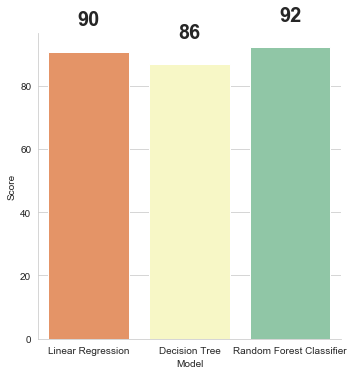

In [561]:
# plotting the accuracy of algorithms using a barplot
sns.set_style("whitegrid")
plot = sns.catplot(x='Model', y='Score', kind='bar', data=acScore, palette='Spectral')

# plot.ax gives the axis object
# plot.ax.patches gives list of bars that can be access using index starting at 0

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=20)

## 11. Conclusion 

 Through visualisation, it shows that Italy produces the most number of wines, followed by Spain and UK.     
 
 While predicting the quality of wine, random forest classifier algorithm produced the best results with 92% accuracy, followed by Logistic Regression with 90% accuracy and Decision Tree Classifier with 86% accuracy. 